In [1]:
import json 
import pandas as pd 
import numpy as np 
import os 
import seaborn as sns 
import matplotlib.pyplot as plt 
from glob import glob 

def load_df(log_dir):
    with open(log_dir, 'r') as f:
        data = f.readlines()
    df = pd.DataFrame(list(pd.Series(data).map(eval).values))    
    return df 

def load_log_data(class_name, version, result_dir,method):

    df = pd.DataFrame()
    for i,v in enumerate(version):
        log_dir = os.path.join(result_dir,class_name,method,v,'log.txt')
        
        temp_df = load_df(log_dir)
        temp_df['hue'] = v 
        
        df = pd.concat([df,temp_df])
    
    return df 

def plot_log(data,class_name, metrics:list, figsize:tuple = (10,7)):
    
    fig, axes = plt.subplots(len(metrics),1,figsize=figsize)
    
    for ax, metric in zip(axes, metrics):
        sns.lineplot(
            x = 'epoch',
            y = metric,
            data = data,
            hue = data['hue'],
            ax = ax 
        )
        
    fig.suptitle(class_name)
    plt.show()

# RD 

/tmp/ipykernel_3426/2145195918.py:59: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  result = df.groupby(hue)['test_image_auroc','test_pixel_auroc'].agg(['last', 'max'])


test_image_auroc         test_pixel_auroc        
                       last     max             last     max
class_name                                                  
bottle               1.0000  1.0000           0.9832  0.9841
cable                0.9449  0.9777           0.9640  0.9705
carpet               0.9904  0.9928           0.9879  0.9904
grid                 0.9524  1.0000           0.9901  0.9923
hazelnut             1.0000  1.0000           0.9875  0.9891
leather              1.0000  1.0000           0.9918  0.9936
metal_nut            1.0000  1.0000           0.9716  0.9740
pill                 0.9711  0.9820           0.9744  0.9762
screw                0.9762  0.9900           0.9958  0.9962
tile                 1.0000  1.0000           0.9519  0.9570
toothbrush           0.9583  0.9694           0.9903  0.9908
transistor           0.9762  0.9862           0.8965  0.8973
wood                 0.9939  0.9965           0.9486  0.9518
zipper               0.9829  0.9898           0.9848  0.9881

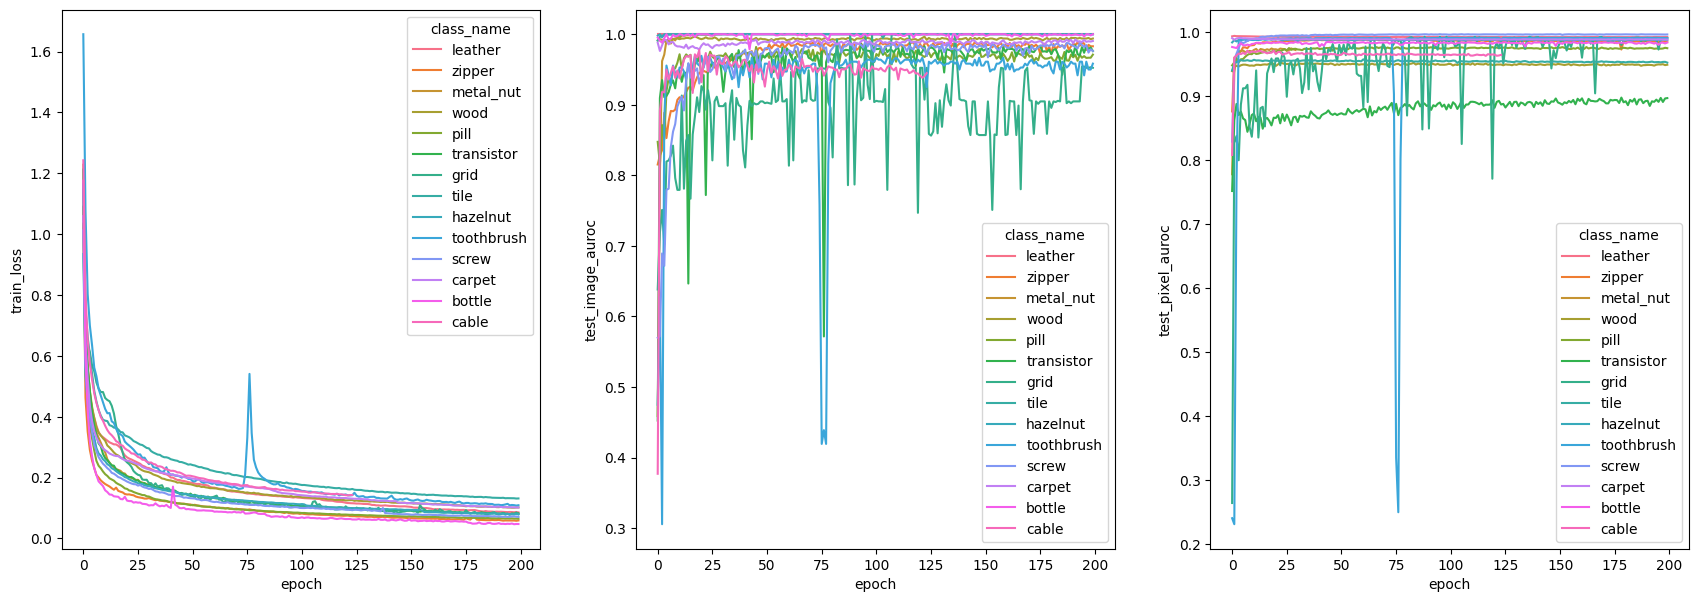

In [7]:
import os 
from glob import glob 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
def read_txt(log_dir):
    with open(log_dir, 'r') as f: 
        data = f.readlines()    
    df = pd.DataFrame([eval(d) for d in data]) 
    return df 

mother_path = 'results'
dataset = 'MVTecAD'
method = 'ReverseDistillation'
class_name = '*'
exp_name = 'baseline-anomaly_ratio_0.0'
seed = 42
hue = 'class_name'

log_dirs = glob(os.path.join(mother_path, dataset, method, class_name, exp_name, f"seed_{seed}", 'log.txt'))

df = pd.DataFrame()
for log_dir in log_dirs:
    temp_df = read_txt(log_dir)
    class_name = log_dir.split('/')[3]
    exp_name = log_dir.split('/')[4]
    temp_df['class_name'] = class_name
    temp_df['exp_name'] = exp_name
    
    
    df = pd.concat([df,temp_df])

     
fig,ax = plt.subplots(1,3, figsize=(21,7))

sns.lineplot(
    x = 'epoch',
    y = 'train_loss',
    hue = hue,
    data = df,
    ax = ax[0]
)
sns.lineplot(
    x = 'epoch',
    y = 'test_image_auroc',
    hue = hue,
    data = df,
    ax = ax[1]
)

sns.lineplot(
    x = 'epoch',
    y = 'test_pixel_auroc',
    hue = hue,
    data = df,
    ax = ax[2]
)

result = df.groupby(hue)['test_image_auroc','test_pixel_auroc'].agg(['last', 'max'])
result

In [ ]:
from glob import glob 

glob('../Data/MVTecAD/')

/tmp/ipykernel_19555/3384777352.py:59: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  result = df.groupby(hue)['test_image_auroc','test_pixel_auroc'].agg(['last', 'max'])


test_image_auroc         test_pixel_auroc        
                       last     max             last     max
class_name                                                  
grid                 1.0000  1.0000           0.9942  0.9944
screw                0.9694  0.9924           0.9953  0.9965
transistor           0.9368  0.9807           0.8455  0.9017
wood                 0.9927  1.0000           0.9700  0.9759

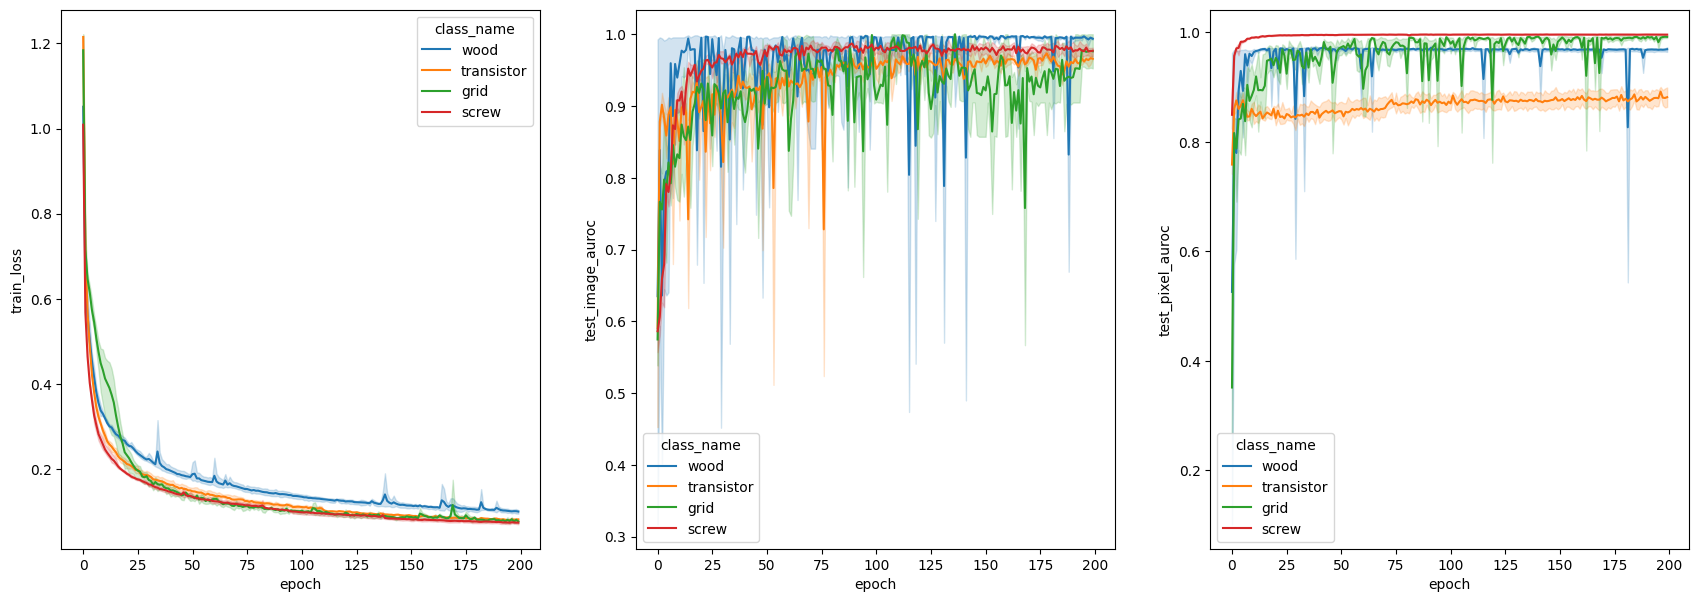

In [24]:
import os 
from glob import glob 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
def read_txt(log_dir):
    with open(log_dir, 'r') as f: 
        data = f.readlines()    
    df = pd.DataFrame([eval(d) for d in data]) 
    return df 

mother_path = 'results'
dataset = 'MVTecAD'
method = 'ReverseDistillation'
class_name = '*'
exp_name = 'dataset_fix-anomaly_ratio_*'
seed = 42
hue = 'class_name'

log_dirs = glob(os.path.join(mother_path, dataset, method, class_name, exp_name, f"seed_{seed}", 'log.txt'))

df = pd.DataFrame()
for log_dir in log_dirs:
    temp_df = read_txt(log_dir)
    class_name = log_dir.split('/')[3]
    exp_name = log_dir.split('/')[4]
    temp_df['class_name'] = class_name
    temp_df['exp_name'] = exp_name
    
    
    df = pd.concat([df,temp_df])

     
fig,ax = plt.subplots(1,3, figsize=(21,7))

sns.lineplot(
    x = 'epoch',
    y = 'train_loss',
    hue = hue,
    data = df,
    ax = ax[0]
)
sns.lineplot(
    x = 'epoch',
    y = 'test_image_auroc',
    hue = hue,
    data = df,
    ax = ax[1]
)

sns.lineplot(
    x = 'epoch',
    y = 'test_pixel_auroc',
    hue = hue,
    data = df,
    ax = ax[2]
)

result = df.groupby(hue)['test_image_auroc','test_pixel_auroc'].agg(['last', 'max'])
result

/tmp/ipykernel_14451/3637050794.py:59: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  result = df.groupby(hue)['test_image_auroc','test_pixel_auroc'].agg(['last', 'max'])


test_image_auroc      test_pixel_auroc        
                          last  max             last     max
anomaly_ratio                                               
0.00                       1.0  1.0           0.9838  0.9842
0.05                       1.0  1.0           0.9836  0.9842
0.10                       1.0  1.0           0.9838  0.9842

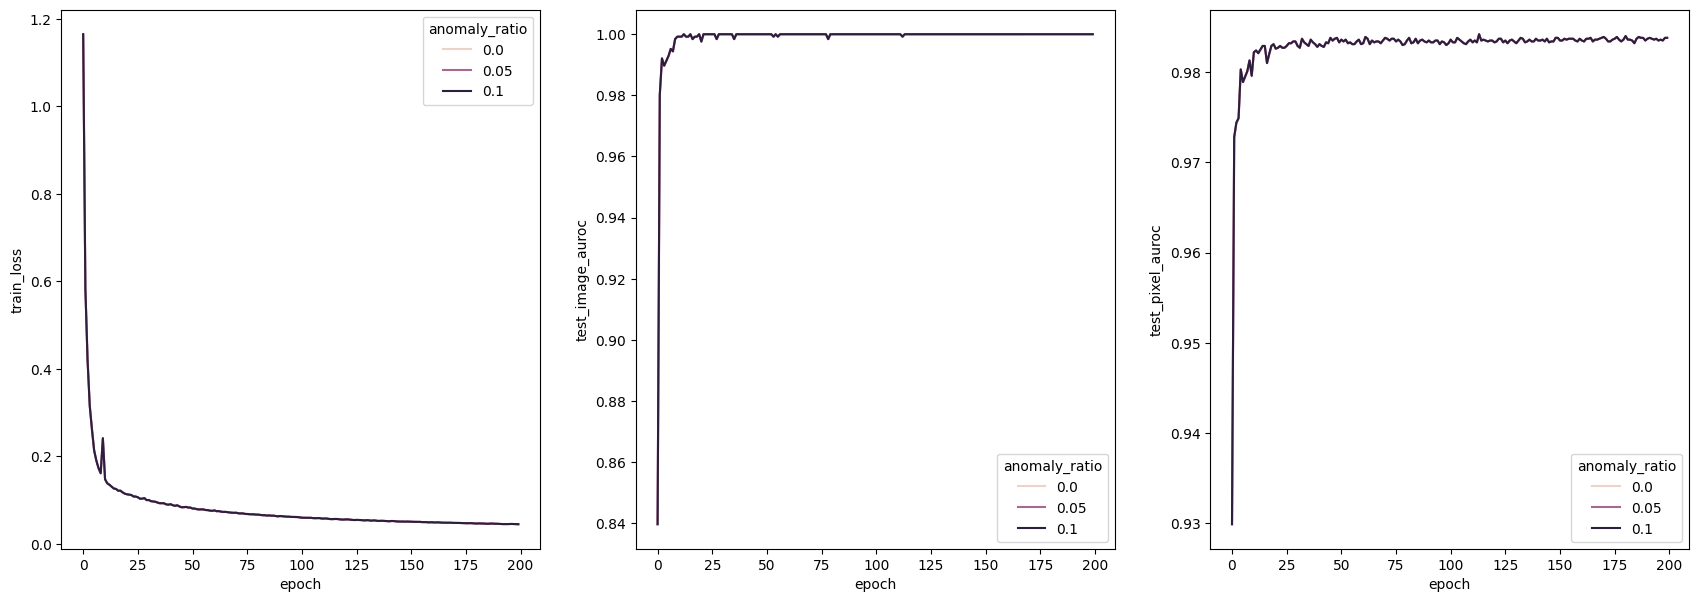

In [6]:
import os 
from glob import glob 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
def read_txt(log_dir):
    with open(log_dir, 'r') as f: 
        data = f.readlines()    
    df = pd.DataFrame([eval(d) for d in data]) 
    return df 

mother_path = 'results'
dataset = 'MVTecAD'
method = 'ReverseDistillation'
class_name = 'bottle'
exp_name = 'dataset_fix-anomaly_ratio_*'
seed = 42
hue = 'anomaly_ratio'

log_dirs = glob(os.path.join(mother_path, dataset, method, class_name, exp_name, f"seed_{seed}", 'log.txt'))

df = pd.DataFrame()
for log_dir in log_dirs:
    temp_df = read_txt(log_dir)
    class_name = log_dir.split('/')[3]
    exp_name = log_dir.split('/')[4]
    temp_df['class_name'] = class_name
    temp_df['exp_name'] = exp_name
    temp_df['anomaly_ratio'] = float(log_dir.split('/')[-3].split('_')[-1])
    
    df = pd.concat([df,temp_df])

     
fig,ax = plt.subplots(1,3, figsize=(21,7))

sns.lineplot(
    x = 'epoch',
    y = 'train_loss',
    hue = hue,
    data = df,
    ax = ax[0]
)
sns.lineplot(
    x = 'epoch',
    y = 'test_image_auroc',
    hue = hue,
    data = df,
    ax = ax[1]
)

sns.lineplot(
    x = 'epoch',
    y = 'test_pixel_auroc',
    hue = hue,
    data = df,
    ax = ax[2]
)

result = df.groupby(hue)['test_image_auroc','test_pixel_auroc'].agg(['last', 'max'])
result

## CIFAR10 

last    0.81714
max     0.82650
dtype: float64

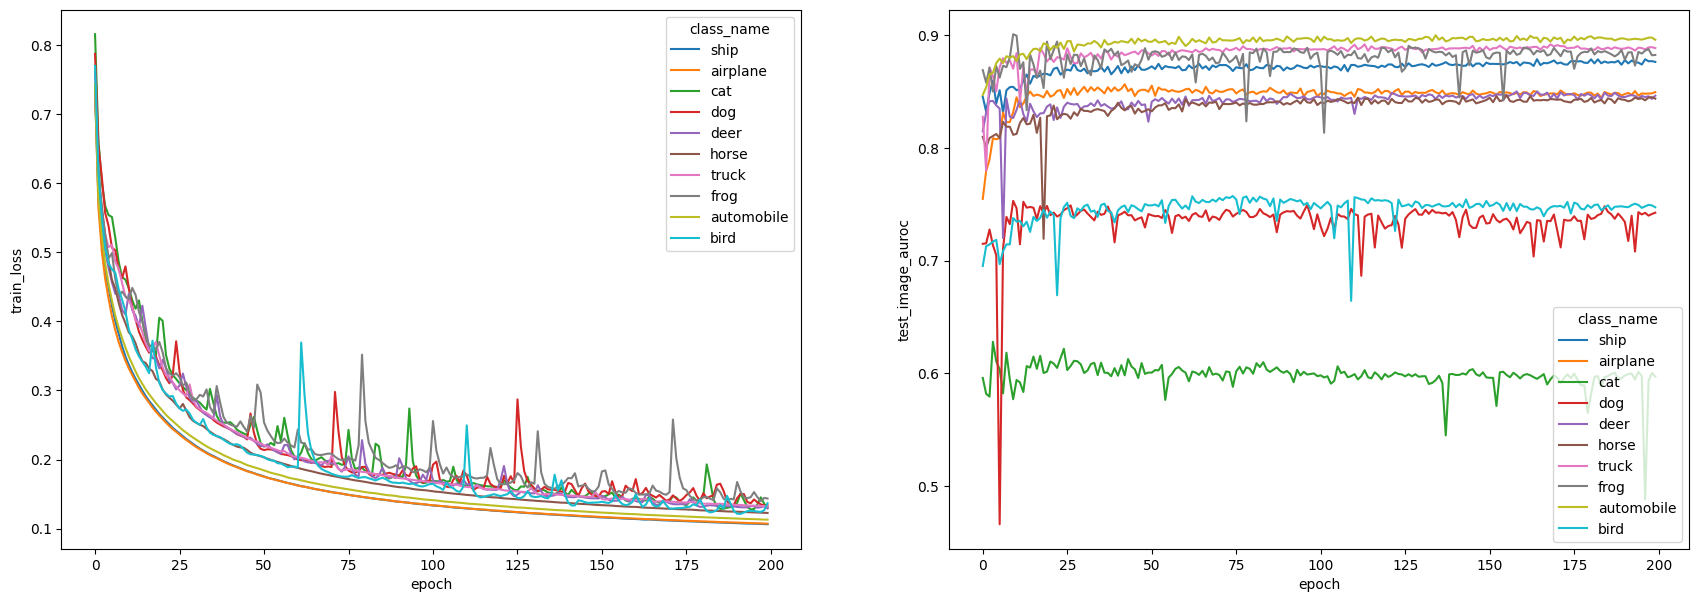

In [6]:
import os 
from glob import glob 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
def read_txt(log_dir):
    with open(log_dir, 'r') as f: 
        data = f.readlines()    
    df = pd.DataFrame([eval(d) for d in data]) 
    return df 

mother_path = 'results'
dataset = 'CIFAR10'
method = 'ReverseDistillation'
class_name = '*'
exp_name = 'baseline-anomaly_ratio_*'
seed = 42
hue = 'class_name'

log_dirs = glob(os.path.join(mother_path, dataset, method, class_name, exp_name, f"seed_{seed}", 'log.txt'))

df = pd.DataFrame()
for log_dir in log_dirs:
    temp_df = read_txt(log_dir)
    class_name = log_dir.split('/')[3]
    exp_name = log_dir.split('/')[4]
    temp_df['class_name'] = class_name
    temp_df['exp_name'] = exp_name
    temp_df['anomaly_ratio'] = float(log_dir.split('/')[-3].split('_')[-1])
    
    df = pd.concat([df,temp_df])

     
fig,ax = plt.subplots(1,2, figsize=(21,7))

sns.lineplot(
    x = 'epoch',
    y = 'train_loss',
    hue = hue,
    data = df,
    ax = ax[0]
)
sns.lineplot(
    x = 'epoch',
    y = 'test_image_auroc',
    hue = hue,
    data = df,
    ax = ax[1]
)

result = df.groupby(hue)['test_image_auroc'].agg(['last', 'max'])
result.mean()

# FastFlow 

In [1]:
import os 
from glob import glob 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
def read_txt(log_dir):
    with open(log_dir, 'r') as f: 
        data = f.readlines()    
    df = pd.DataFrame([eval(d) for d in data]) 
    return df 

mother_path = 'results'
dataset = 'MVTecAD'
method = 'FastFlow'
class_name = '*' 
exp_name = '-norm_using_each_class-anomaly_ratio_0'
seed = 42


log_dirs = glob(os.path.join(mother_path, dataset, method, class_name, exp_name, f"seed_{seed}", 'log.txt'))

df = pd.DataFrame()
for log_dir in log_dirs:
    temp_df = read_txt(log_dir)
    class_name = log_dir.split('/')[3]
    temp_df['class_name'] = class_name
    
    df = pd.concat([df,temp_df])
     
# fig,ax = plt.subplots(1,3, figsize=(21,7))

# sns.lineplot(
#     x = 'epoch',
#     y = 'train_loss',
#     hue = 'class_name',
#     data = df,
#     ax = ax[0]
# )
# sns.lineplot(
#     x = 'epoch',
#     y = 'test_image_auroc',
#     hue = 'class_name',
#     data = df,
#     ax = ax[1]
# )

# sns.lineplot(
#     x = 'epoch',
#     y = 'test_pixel_auroc',
#     hue = 'class_name',
#     data = df,
#     ax = ax[2]
# )

result = df.groupby('class_name')['test_image_auroc','test_pixel_auroc'].agg(['last', 'max'])
result

/tmp/ipykernel_14451/871958674.py:55: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  result = df.groupby('class_name')['test_image_auroc','test_pixel_auroc'].agg(['last', 'max'])


test_image_auroc         test_pixel_auroc        
                       last     max             last     max
class_name                                                  
bottle               1.0000  1.0000           0.9780  0.9799
cable                0.8482  0.9288           0.8983  0.9581
capsule              0.8895  0.9565           0.9702  0.9820
carpet               0.9779  0.9916           0.9853  0.9863
grid                 0.9432  0.9942           0.9679  0.9864
hazelnut             0.7414  0.9121           0.9566  0.9687
leather              0.9681  0.9959           0.9837  0.9934
pill                 0.8843  0.9566           0.9475  0.9676
screw                0.7083  0.8053           0.9353  0.9566
tile                 0.9906  1.0000           0.9398  0.9538
toothbrush           0.9639  0.9694           0.9778  0.9809
transistor           0.8958  0.9521           0.9498  0.9643
wood                 0.9904  1.0000           0.8646  0.9232
zipper               0.9451  0.9682           0.9660  0.9788

# STPM 

## Baseline 재현 확인 

In [2]:
version = 'anomalib-anomaly_ratio_0'
result_dir = './results/MVTecAD/'
method = 'AnomalibSTPM'

log_dirs = glob(os.path.join(result_dir,method,'*',version,'results_seed0_best.json'))
df = pd.DataFrame()

for log_dir in log_dirs:
    temp_df = pd.DataFrame(json.load(open(log_dir)))
    temp_df['class'] = log_dir.split('/')[-3]
    df = pd.concat([df,temp_df])    
df = df.reset_index()    
df = df.pivot(index='class', columns='index', values='test')
df = df.reset_index()

In [3]:
df[['class','image_auroc','pixel_auroc','aupro']].sort_values(by='class',ascending=True)

index,class,image_auroc,pixel_auroc,aupro
0,bottle,1.0000,0.9879,0.8024
1,cable,0.9151,0.9667,0.8903
2,capsule,0.7044,0.9522,0.3634
3,carpet,0.9539,0.9814,0.7656
4,grid,0.9240,0.9723,0.8255
5,hazelnut,0.9739,0.9900,0.9270
6,leather,0.9986,0.9896,0.7782
7,metal_nut,0.9687,0.9796,0.8856
8,pill,0.9089,0.9738,0.8342
9,screw,0.7196,0.9581,0.8246


## Anomaly Ratio 비교 

In [4]:
anomaly_ratio=[0, 0.05, 0.1]
result_dir = './results/MVTecAD/'
metrics = ['test_pixel_auroc','test_aupro']
method = 'AnomalibSTPM'
df = pd.DataFrame()

for ar in anomaly_ratio:
    version = f'anomalib-anomaly_ratio_{ar}'
    log_dirs = glob(os.path.join(result_dir,method,'*',version,'results_seed0_best.json'))
    

    for log_dir in log_dirs:
        temp_df = pd.DataFrame(json.load(open(log_dir)))
        
        temp_df['class'] = log_dir.split('/')[-3]
        temp_df['anomaly_ratio'] = ar 
        
        df = pd.concat([df,temp_df])    
df = df.reset_index()    

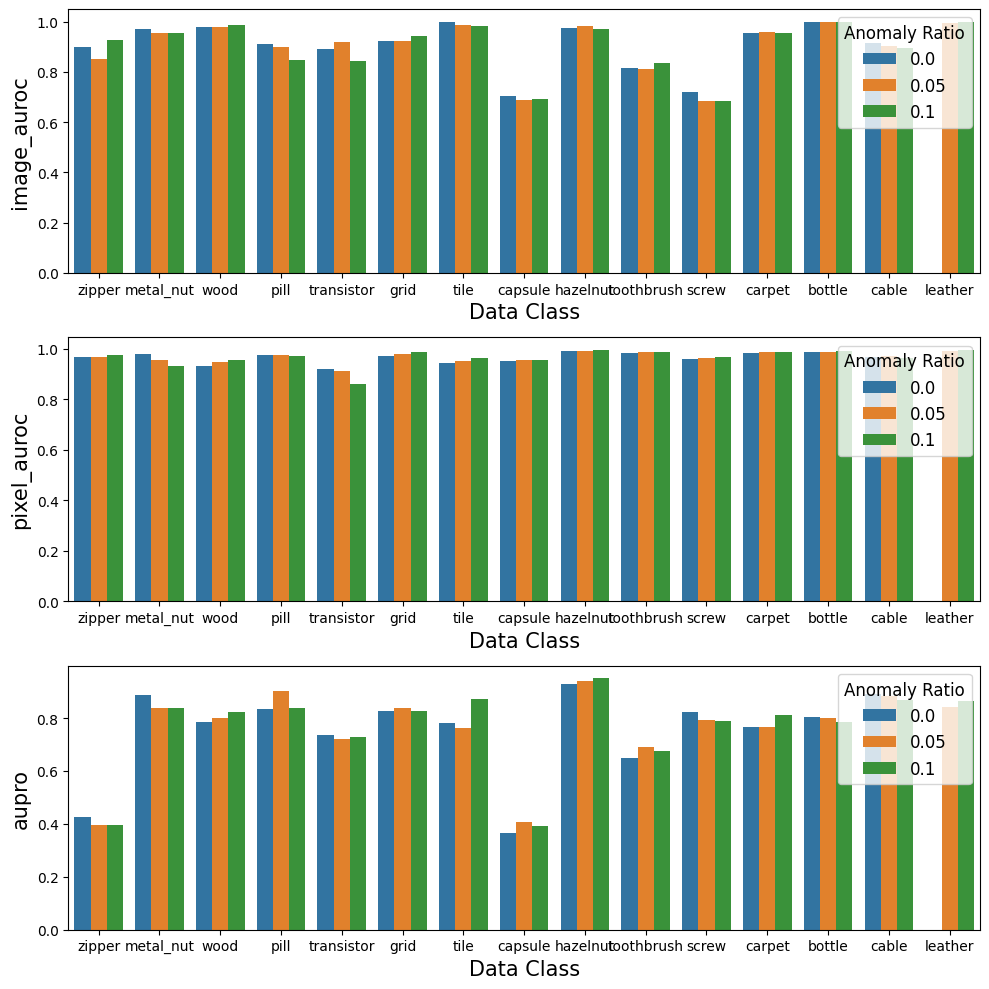

In [13]:
metrics = ['image_auroc','pixel_auroc','aupro']

fig, axes = plt.subplots(3,1 ,figsize=(10,10))
for i, (ax, m) in enumerate(zip(axes,metrics)):
    temp_df = df[df['index']==m]
    
    sns.barplot(
        x = 'class',
        y = 'test',
        data = temp_df,
        hue = 'anomaly_ratio',
        ax = ax 
    )
    

    ax.set_xlabel("Data Class", fontsize=15)  # x 축 레이블 추가
    ax.set_ylabel(f"{m}", fontsize=15)  # y 축 레이블 추가
    ax.legend(title="Anomaly Ratio", fontsize=12, title_fontsize=12, loc="upper right")
plt.tight_layout()
plt.show()    

In [16]:
df.groupby(['index','anomaly_ratio']).mean().reset_index()

/tmp/ipykernel_27850/1817876000.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['index','anomaly_ratio']).mean().reset_index()


,index,anomaly_ratio,best_step,test
0,aupro,0.00,82.357143,0.749600
1,aupro,0.05,85.600000,0.758913
2,aupro,0.10,85.800000,0.763740
3,image_auroc,0.00,82.357143,0.903729
4,image_auroc,0.05,85.600000,0.902013
5,image_auroc,0.10,85.800000,0.900620
6,loss,0.00,82.357143,22.228161
7,loss,0.05,85.600000,20.386680
8,loss,0.10,85.800000,19.175978
9,pixel_auroc,0.00,82.357143,0.964193


,index,anomaly_ratio,best_step,test
0,aupro,0.00,82.357143,0.749600
1,aupro,0.05,85.600000,0.758913
2,aupro,0.10,85.800000,0.763740


/tmp/ipykernel_27850/1178475854.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp_df = df.groupby(['index','anomaly_ratio']).mean().reset_index()
/tmp/ipykernel_27850/1178475854.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(
/tmp/ipykernel_27850/1178475854.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(
/tmp/ipykernel_27850/1178475854.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


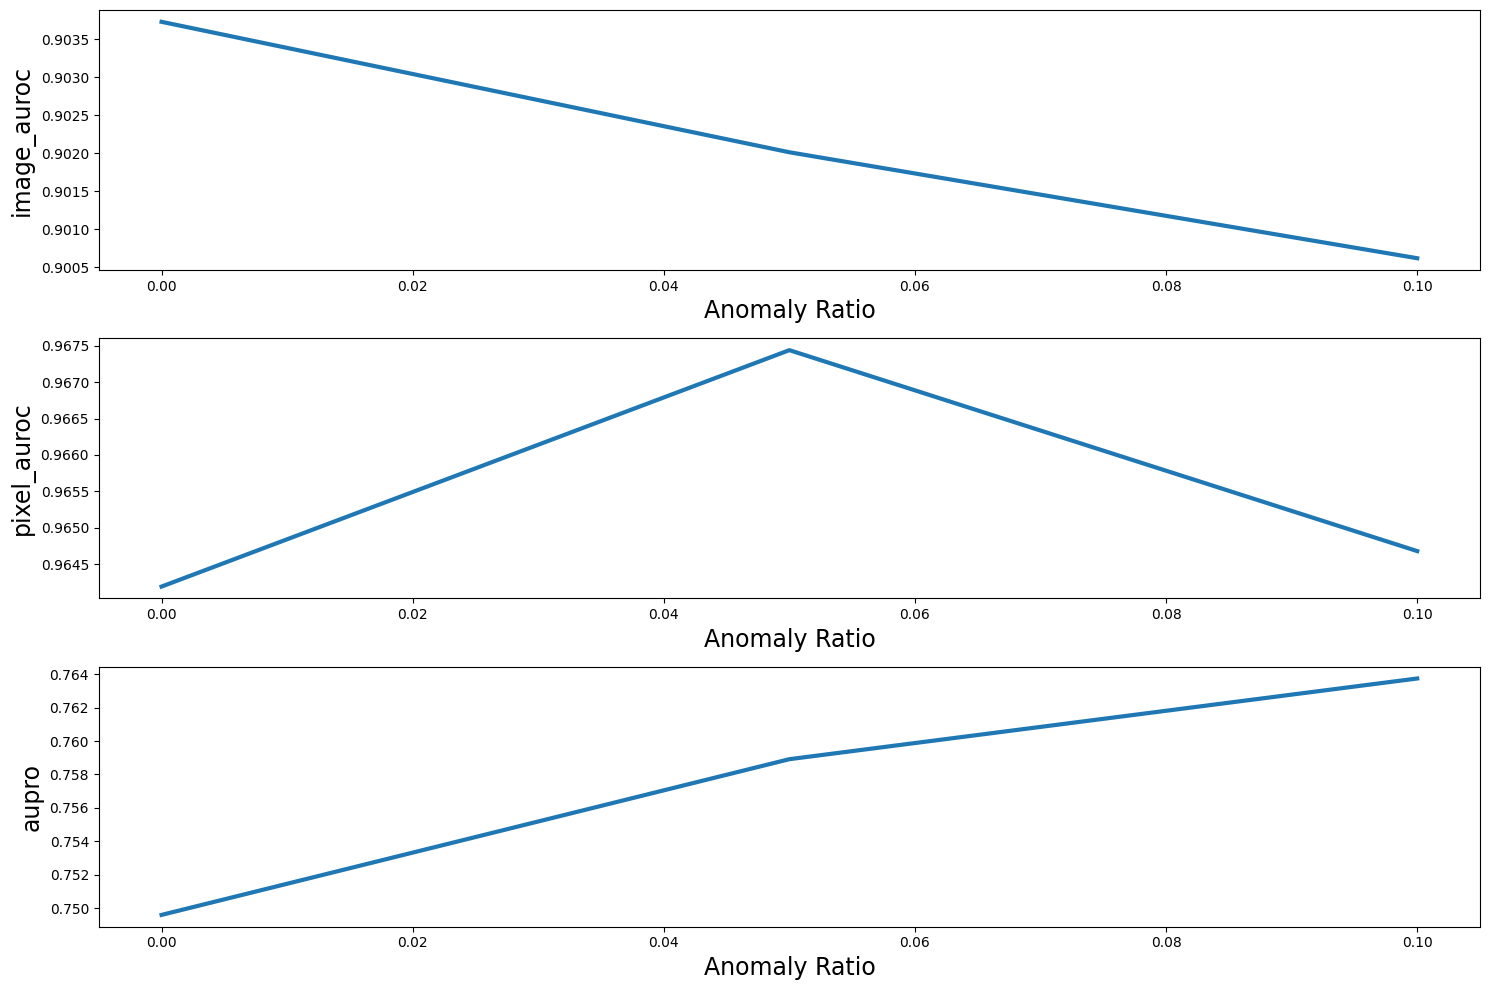

In [23]:
temp_df = df.groupby(['index','anomaly_ratio']).mean().reset_index()
metrics = ['image_auroc','pixel_auroc','aupro']

fig, axes = plt.subplots(3,1 ,figsize=(15,10))
for i, (ax, m) in enumerate(zip(axes,metrics)):
    
    sns.lineplot(
        x = 'anomaly_ratio',
        y = 'test',
        data = temp_df[temp_df['index'] == m],
        ax = ax,
        linewidth=3,
        palette=sns.color_palette('Set2', n_colors=5)
    )
    
    ax.set_xlabel("Anomaly Ratio", fontsize=17)  # x 축 레이블 추가
    ax.set_ylabel(f"{m}", fontsize=17)  # y 축 레이블 추가
plt.tight_layout()
plt.show()    

# PatchCore Base 

## 성능 재현 확인 

In [75]:
version = ['coreset_ratio-coreset_ratio_0.1-anomaly_ratio_0']
result_dir = './results/MVTecAD/'
metrics = ['test_pixel_auroc','test_aupro']
method = 'PatchCore'

log_dirs = glob(os.path.join(result_dir,method,'*',version[0],'results_seed0_best.json'))
df = pd.DataFrame()

for log_dir in log_dirs:
    temp_df = pd.DataFrame(json.load(open(log_dir)))
    temp_df['class'] = log_dir.split('/')[-3]
    df = pd.concat([df,temp_df])    
df = df.reset_index()    
df = df.pivot(index='class', columns='index', values='test')
df_25 = df.reset_index()

## Anomaly Ratio 비교 

In [2]:
anomaly_ratio=[0,0.02,0.04,0.06,0.08,0.1]
coreset_ratio=[0.01,0.1,0.25]


result_dir = './results/MVTecAD/'
metrics = ['test_pixel_auroc','test_aupro']
method = 'PatchCore'
df = pd.DataFrame()

for ar in anomaly_ratio:
    for cr in coreset_ratio:
        version = f'coreset_ratio-coreset_ratio_{cr}-anomaly_ratio_{ar}'
        log_dirs = glob(os.path.join(result_dir,method,'*',version,'results_seed0_best.json'))
        

        for log_dir in log_dirs:
            temp_df = pd.DataFrame(json.load(open(log_dir)))
            
            temp_df['class'] = log_dir.split('/')[-3]
            temp_df['anomaly_ratio'] = ar 
            temp_df['coreset_ratio'] = cr 
            
            df = pd.concat([df,temp_df])    
df = df.reset_index()    


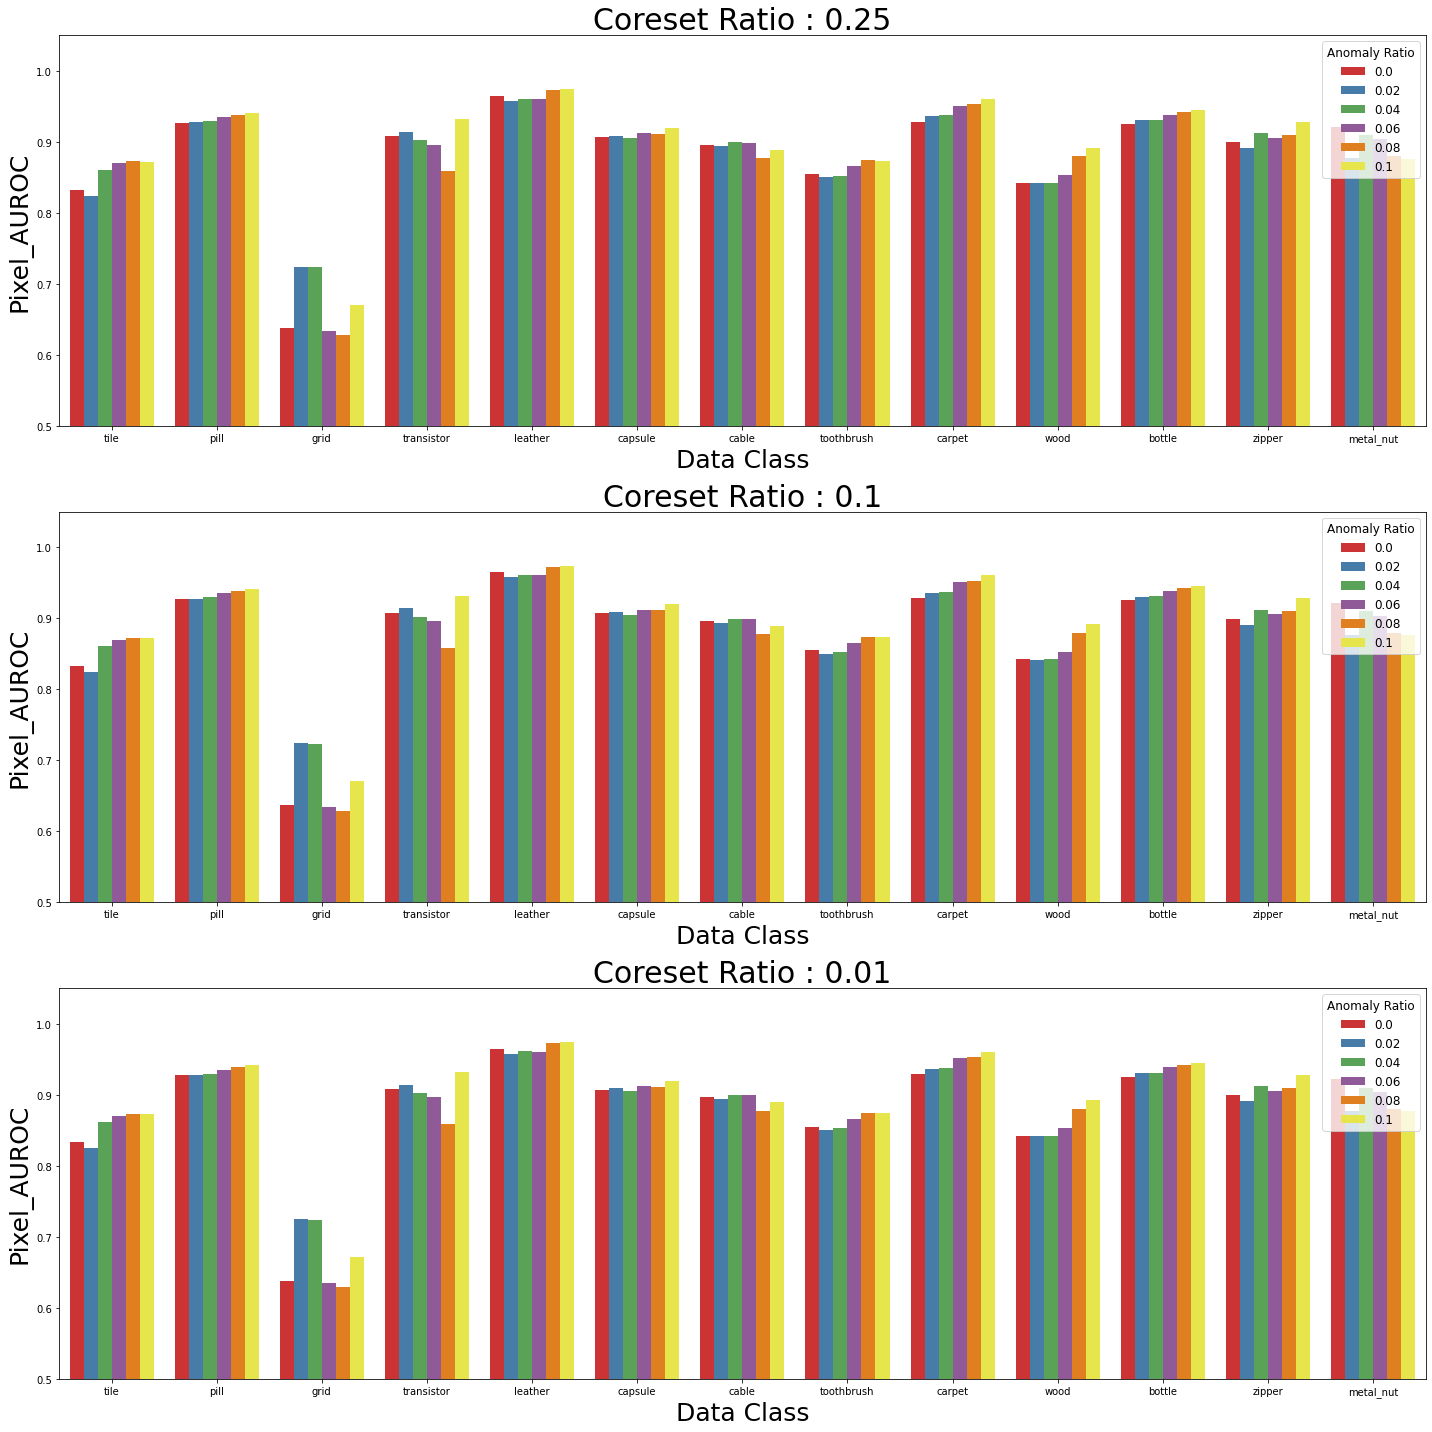

In [58]:
metrics = ['image_auroc','pixel_auroc','aupro']
coreset_ratio=[0.25, 0.1, 0.01]
fig, axes = plt.subplots(3,1 ,figsize=(20,20))
for i, (ax, cr) in enumerate(zip(axes,coreset_ratio)):
    temp_df = df[df['coreset_ratio'] == cr]
    temp_df = temp_df[temp_df['coreset_ratio']==0.25]
    temp_df = temp_df[temp_df['index']=='pixel_auroc']
    
    sns.barplot(
        x = 'class',
        y = 'test',
        data = temp_df_25,
        hue = 'anomaly_ratio',
        ax = ax 
    )
    ax.set_ylim(0.5,1.05)

    ax.set_title(f"Coreset Ratio : {cr}", fontsize=30)
    ax.set_xlabel("Data Class", fontsize=25)  # x 축 레이블 추가
    ax.set_ylabel("Pixel_AUROC", fontsize=25)  # y 축 레이블 추가
    ax.legend(title="Anomaly Ratio", fontsize=12, title_fontsize=12, loc="upper right")
plt.tight_layout()
plt.show()    

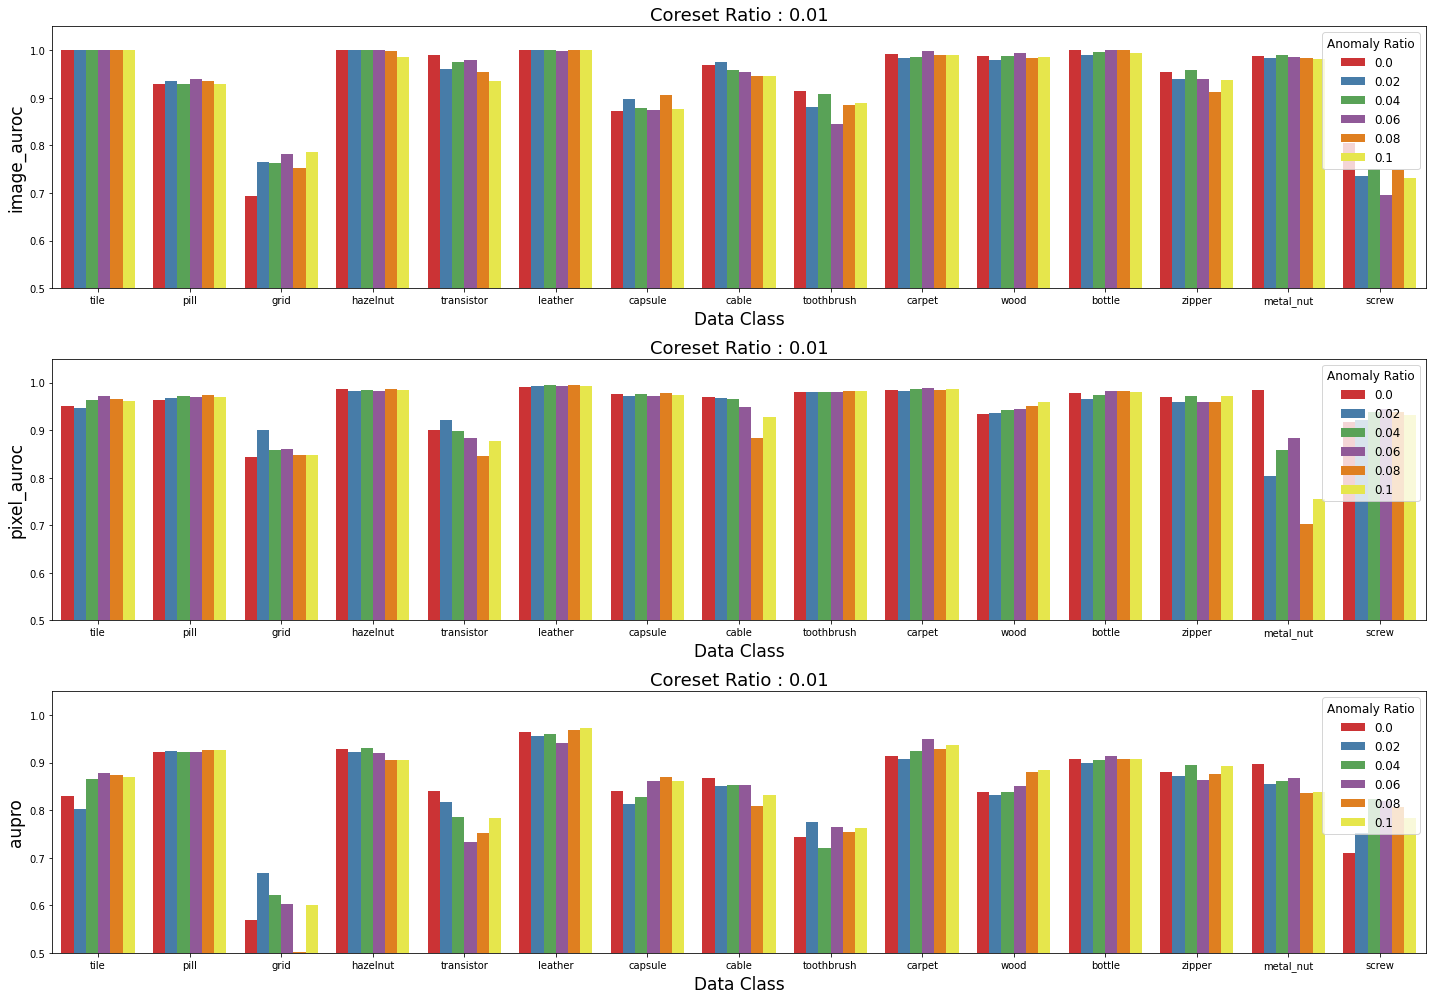

In [54]:
metrics = ['image_auroc','pixel_auroc','aupro']
coreset_ratio=[0.25, 0.1, 0.01]
cr = coreset_ratio[2]
fig, axes = plt.subplots(3,1 ,figsize=(20,14))
for i, (ax, m) in enumerate(zip(axes,metrics)):
    temp_df = df[df['index'] == m]
    temp_df = temp_df[temp_df['coreset_ratio']==cr]
    
    
    sns.barplot(
        x = 'class',
        y = 'test',
        data = temp_df,
        hue = 'anomaly_ratio',
        ax = ax 
    )
    ax.set_ylim(0.5,1.05)

    ax.set_title(f"Coreset Ratio : {cr}", fontsize=18)
    ax.set_xlabel("Data Class", fontsize=17)  # x 축 레이블 추가
    ax.legend(title="Anomaly Ratio", fontsize=12, title_fontsize=12, loc="upper right")
    ax.set_ylabel(f"{m}", fontsize=17)  # y 축 레이블 추가
plt.tight_layout()
plt.show()    

/tmp/ipykernel_29031/3830231802.py:7: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.lineplot(
/tmp/ipykernel_29031/3830231802.py:7: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.lineplot(
/tmp/ipykernel_29031/3830231802.py:7: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.lineplot(


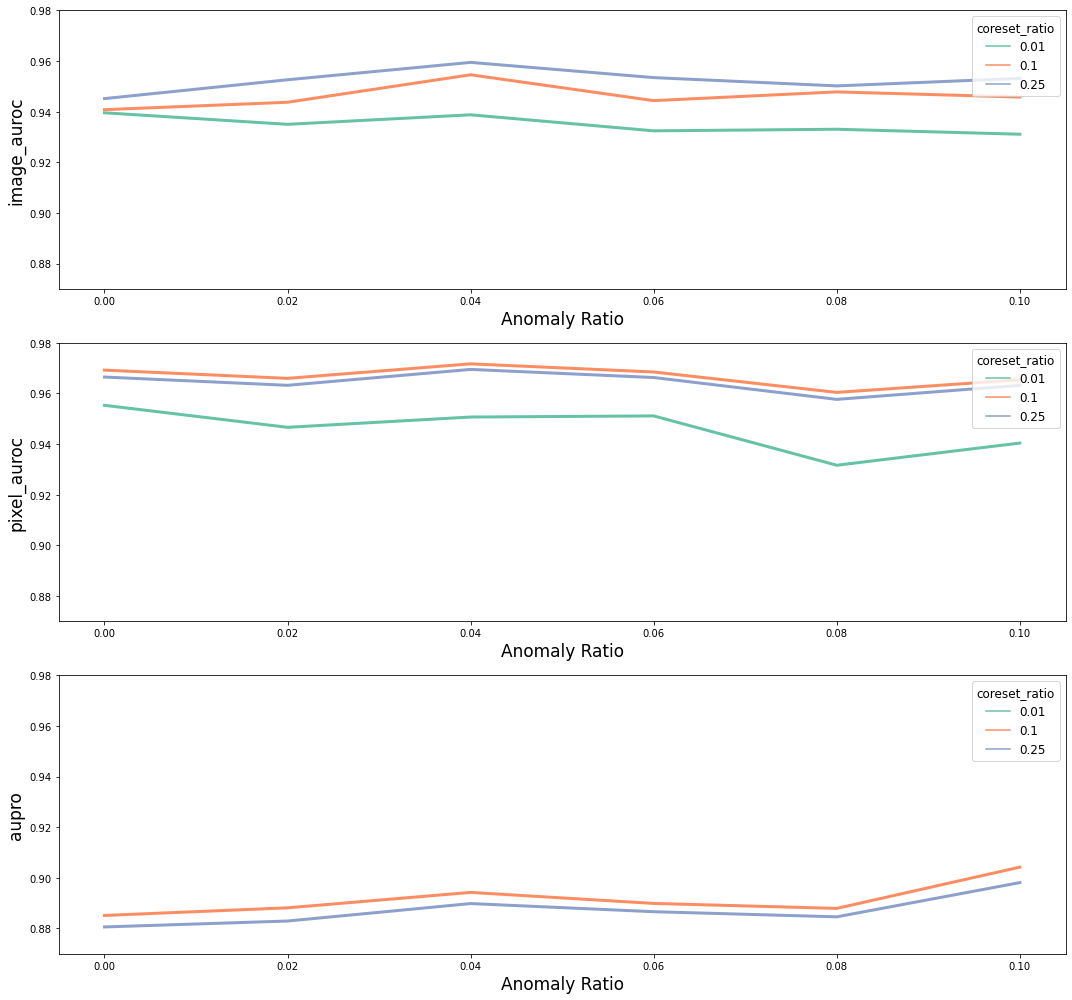

In [32]:
df = df.drop(df[(df['class'] == 'screw') & (df['coreset_ratio'] == 0.25)].index)
df = df.drop(df[(df['class'] == 'hazelnut') & (df['coreset_ratio'] == 0.25)].index)
temp_df = df.groupby(['coreset_ratio','index','anomaly_ratio']).mean().reset_index()
metrics = ['image_auroc','pixel_auroc','aupro']

fig, axes = plt.subplots(3,1 ,figsize=(15,14))
for i, (ax, m) in enumerate(zip(axes,metrics)):
    temp_df = df[df['index'] == m].groupby(['anomaly_ratio','coreset_ratio']).mean().reset_index()
    
    sns.lineplot(
        x = 'anomaly_ratio',
        y = 'test',
        data = temp_df,
        hue = 'coreset_ratio',
        ax = ax,
        linewidth=3,
        palette=sns.color_palette('Set2', n_colors=5)
    )
    
    ax.set_ylim(0.87, 0.98)
    ax.set_xlabel("Anomaly Ratio", fontsize=17)  # x 축 레이블 추가
    ax.legend(title="coreset_ratio", fontsize=12, title_fontsize=12, loc="upper right")
    ax.set_ylabel(f"{m}", fontsize=17)  # y 축 레이블 추가
plt.tight_layout()
plt.show()    